In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Crop_recommendation.csv", delimiter=',')
df.head()

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,rice
1,85,58,41,21.770462,80.319644,7.038096,rice
2,60,55,44,23.004459,82.320763,7.840207,rice
3,74,35,40,26.491096,80.158363,6.980401,rice
4,78,42,42,20.130175,81.604873,7.628473,rice


## Mencari jumlah tiap label

In [41]:
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Total']
label_counts

,Label,Total
0,rice,139
1,Soyabeans,130
2,banana,130
3,beans,125
4,cowpeas,122
5,orange,122
6,maize,119
7,coffee,110
8,peas,100
9,groundnuts,100


## Membagi data menjadi 2/3 data training dan sisa nya akan masuk ke data testing

In [42]:
from sklearn.model_selection import train_test_split

train_data = pd.DataFrame()
test_data = pd.DataFrame()

for label in df['label'].unique():
    subset = df[df['label'] == label]
    train, test = train_test_split(subset, test_size=1/3, random_state=42, stratify=None)
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])

print('Data Training')
print(train_data['label'].value_counts())
print("----------------------------------")
print('Data Testing')
print(test_data['label'].value_counts())

Data Training
label
rice          92
Soyabeans     86
banana        86
beans         83
cowpeas       81
orange        81
maize         79
coffee        73
peas          66
groundnuts    66
mango         66
watermelon    66
grapes        66
apple         66
cotton        66
Name: count, dtype: int64
----------------------------------
Data Testing
label
rice          47
Soyabeans     44
banana        44
beans         42
cowpeas       41
orange        41
maize         40
coffee        37
peas          34
groundnuts    34
mango         34
watermelon    34
grapes        34
apple         34
cotton        34
Name: count, dtype: int64


## Training data dengan membentuk 100 pohon (tree) dengan cara bootstrap

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Features and target
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph']
X_train = train_data[features]
y_train = train_data['label']
X_test = test_data[features]
y_test = test_data['label']

# Train model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Predict
y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9843


In [47]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Turn into a DataFrame for readable format
cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)

print("Confusion Matrix:")
cm_df

Confusion Matrix:


,Soyabeans,apple,banana,beans,coffee,cotton,cowpeas,grapes,groundnuts,maize,mango,orange,peas,rice,watermelon
Soyabeans,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0
apple,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0
banana,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0
beans,0,0,0,42,0,0,0,0,0,0,0,0,0,0,0
coffee,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0
cotton,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0
cowpeas,0,0,0,0,0,0,41,0,0,0,0,0,0,0,0
grapes,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0
groundnuts,0,0,0,0,0,0,0,0,33,0,0,0,1,0,0
maize,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0


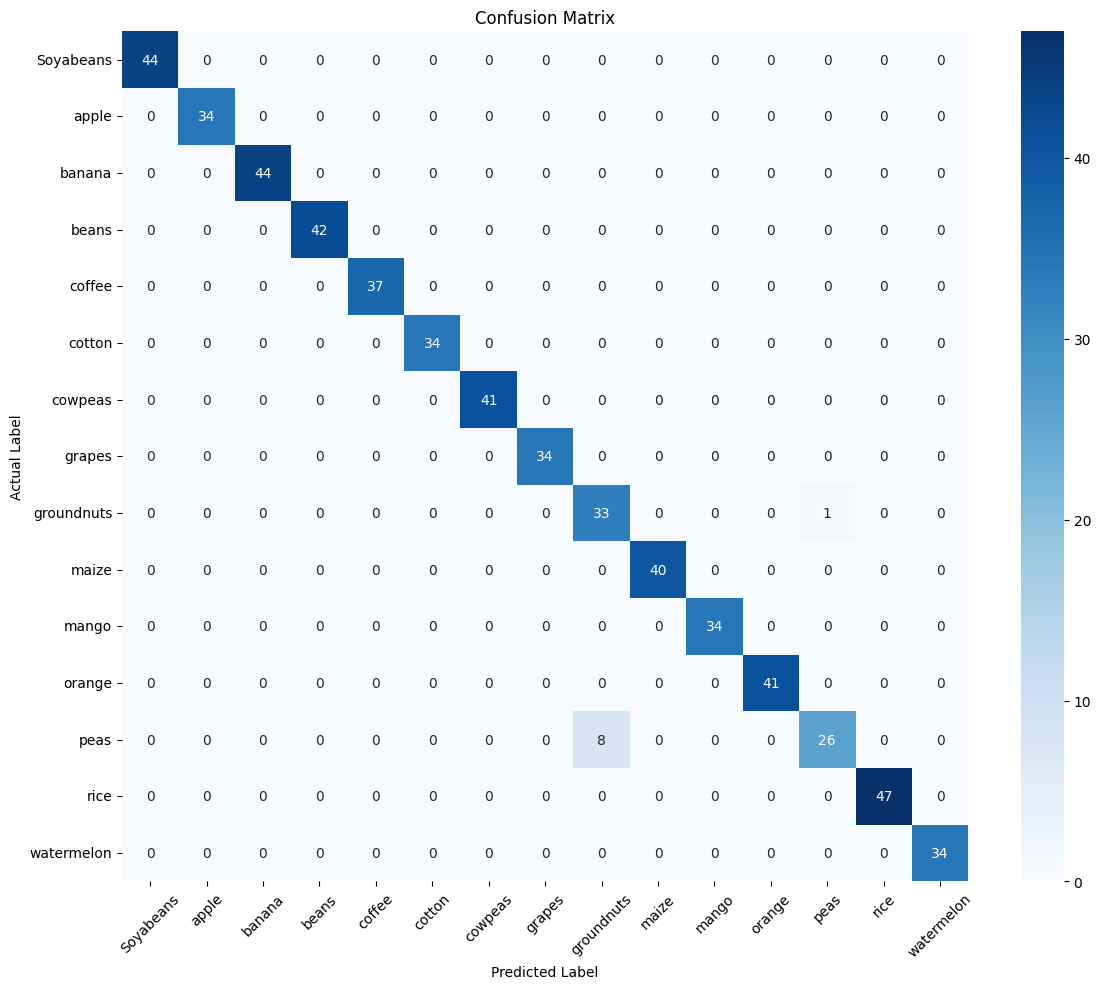

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [44]:
print("Accuracy:", test_acc)
print("Precision (macro):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (macro):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9843205574912892
Precision (macro): 0.9862484222983926
Recall (macro): 0.9843205574912892
F1 Score (macro): 0.98415262466442


In [45]:
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan klasifikasi:
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        44
       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        44
       beans       1.00      1.00      1.00        42
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        34
     cowpeas       1.00      1.00      1.00        41
      grapes       1.00      1.00      1.00        34
  groundnuts       0.80      0.97      0.88        34
       maize       1.00      1.00      1.00        40
       mango       1.00      1.00      1.00        34
      orange       1.00      1.00      1.00        41
        peas       0.96      0.76      0.85        34
        rice       1.00      1.00      1.00        47
  watermelon       1.00      1.00      1.00        34

    accuracy                           0.98       574
   macro avg       0.98      0.98      0.98       574
weig

## Understanding Precision, Recall, and F1-Score

Let's break down the use and interpretation of precision, recall, and the F1-score in the context of your classification model.

### Understanding the Basics with a Confusion Matrix

Imagine your random forest model is trying to predict whether a plant is 'rice' or 'not rice'. We can summarize the model's performance for the 'rice' class using a confusion matrix:

|                    | Predicted: Rice | Predicted: Not Rice |
| :----------------- | :-------------- | :------------------ |
| **Actual: Rice** | True Positive (TP) | False Negative (FN) |
| **Actual: Not Rice** | False Positive (FP) | True Negative (TN)  |

* **True Positive (TP):** The model correctly predicted 'rice', and it actually was 'rice'.
* **False Positive (FP):** The model incorrectly predicted 'rice', but it was actually 'not rice'. (Also known as a Type I error).
* **False Negative (FN):** The model incorrectly predicted 'not rice', but it was actually 'rice'. (Also known as a Type II error).
* **True Negative (TN):** The model correctly predicted 'not rice', and it actually was 'not rice'.

### 1. Precision: "Of all the plants the model said were rice, how many actually were?"

* **Formula:** $\text{Precision} = \frac{TP}{TP + FP}$
* **Usefulness:** Precision is useful when you want to minimize **false positives**. In other words, when you want to be very sure that if the model predicts a certain class, it's highly likely to be correct.
* **Interpretation:**
    * A **high precision** (closer to 1.0) means that when the model predicts a plant is 'rice', it is very often correct. There aren't many instances where it incorrectly labels a 'not rice' plant as 'rice'.
    * A **low precision** (closer to 0.0) means that when the model predicts a plant is 'rice', it is often wrong. Many 'not rice' plants are being incorrectly classified as 'rice'.

**Example Interpretation from Data:**

If your model has a precision of 0.85 for the 'rice' label, it means that out of every 100 plants your model predicted as 'rice', 85 of them were actually rice, and 15 were something else (false alarms).

### 2. Recall (Sensitivity or True Positive Rate): "Of all the plants that were actually rice, how many did the model correctly identify?"

* **Formula:** $\text{Recall} = \frac{TP}{TP + FN}$
* **Usefulness:** Recall is useful when you want to minimize **false negatives**. In other words, when it's important to identify as many actual positive instances as possible, even if it means having some false positives.
* **Interpretation:**
    * A **high recall** (closer to 1.0) means that the model is good at finding most of the actual 'rice' plants. It doesn't miss many of them.
    * A **low recall** (closer to 0.0) means that the model misses many of the actual 'rice' plants, incorrectly classifying them as 'not rice'.

**Example Interpretation from Data:**

If your model has a recall of 0.92 for the 'rice' label, it means that out of every 100 plants that were actually rice, your model correctly identified 92 of them. It missed 8 actual rice plants.

### 3. F1-Score: Finding the Balance Between Precision and Recall

* **Formula:** $\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$
* **Usefulness:** The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both concerns. It's particularly useful when you have an imbalanced dataset (where one class has significantly more instances than others) or when both false positives and false negatives are important to consider.
* **Interpretation:**
    * A **high F1-score** (closer to 1.0) indicates a good balance between precision and recall. The model is performing well in both correctly identifying positive instances and minimizing false alarms and misses.
    * A **low F1-score** (closer to 0.0) suggests that the model has a poor balance between precision and recall. It might have high precision but low recall (or vice versa), indicating a problem with the classification performance.

**Example Interpretation from Data:**

If your model has an F1-score of 0.88 for the 'rice' label, it suggests a relatively good balance between its ability to correctly predict rice and its ability to find all the actual rice plants.

### How to Interpret from Your Overall Output:

When you calculated the `accuracy`, `precision`, `recall`, and `f1_score` with `average='weighted'`, these metrics are calculated for each class (rice, banana, soybean, etc.) and then averaged, weighted by the number of true instances for each class. This gives you an overall sense of how well your model performs across all the different crop labels, taking into account any class imbalance in your test set.

* **Accuracy:** Gives you the overall percentage of correctly classified instances. While easy to understand, it can be misleading on imbalanced datasets.
* **Weighted Precision:** Tells you, on average (weighted by the prevalence of each class), how often the model's positive predictions were correct.
* **Weighted Recall:** Tells you, on average (weighted by the prevalence of each class), what proportion of actual positive instances the model correctly identified.
* **Weighted F1-score:** Provides a single, balanced measure of the model's performance across all classes, considering both precision and recall and accounting for class imbalance.

By looking at these metrics together, you can get a comprehensive understanding of your model's strengths and weaknesses in classifying different crop types. For example, if you see a high precision but a lower recall for a specific crop, it means the model is very confident when it predicts that crop, but it might be missing some actual instances of that crop. The F1-score helps you see the overall trade-off.